# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
#try:
#    print('Installing pip:')
#    sc.install_pypi_package("pip==21.3.1")
#except Exception as e:
#    print(e)
    
#try:
#    print('Installing numpy:')
#    sc.install_pypi_package("numpy==1.18")
#except Exception as e:
#    print(e)
   
#try:
#    print('Installing pyspark:')
#    sc.install_pypi_package("pyspark==2.0.0")
#except Exception as e:
#    print(e)
    
try:
    print('Installing matplotlib:')
    sc.install_pypi_package("matplotlib==3.2.1")
except Exception as e:
    print(e)

try:
    print('Installing pyparsing:')
    sc.install_pypi_package("pyparsing==2.4.7")
except Exception as e:
    print(e)

try:
    print('Installing python-dateutil:')
    sc.install_pypi_package("python-dateutil==2.8.1")
except Exception as e:
    print('python-dateutil:')
    print(e)
    
try:
    print('Installing kiwisolver:')
    sc.install_pypi_package("kiwisolver==1.2.0")
except Exception as e:
    print(e)
    
try:
    print('Installing cycler:')
    sc.install_pypi_package("cycler==0.10.0")
except Exception as e:
    print(e)
        
try:
    print('Installing pandas:')
    sc.install_pypi_package("pandas==1.0.3")
except Exception as e:
    print(e)

try:
    print('Installing pybind11:')
    sc.install_pypi_package("pybind11==2.8.1")
except Exception as e:
    print(e)
    
try:
    print('Installing scipy:')
    sc.install_pypi_package("scipy==1.4.1")
except Exception as e:
    print(e)
    
try:
    print('Installing seaborn:')
    sc.install_pypi_package("seaborn==0.11.2")
except Exception as e:
    print(e)

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1638245194643_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Installing matplotlib:

Installing pyparsing:
  Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6

Installing python-dateutil:
  Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2

Installing kiwisolver:
  Found existing installation: kiwisolver 1.3.2
    Uninstalling kiwisolver-1.3.2:
      Successfully uninstalled kiwisolver-1.3.2

Installing cycler:
  Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0

Installing pandas:

Installing pybind11:

Installing scipy:

Installing seaborn:

In [2]:
# Confirm our packages have been downloaded
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.10.0   
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.2.0    
lxml                       4.5.2    
matplotlib                 3.2.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.0.3    
pip                        9.0.1    
py-dateutil                2.2      
pybind11                   2.8.1    
pyparsing                  2.4.7    
python-dateutil            2.8.1    
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
scipy                      1.4.1    
seaborn                    0.11.2   
s

# Importing

Now, import the installed packages from the previous block below.

In [3]:
# Import packages

import pandas as pd
import pyspark.sql.functions as psf
import seaborn as sns
import matplotlib.pyplot as plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [4]:
# Load business data
df_business = spark.read.json('s3://yelpdatasta9760/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

Display the number of rows and columns in our dataset.

In [5]:
print(f'Total Columns: {len(df_business.dtypes)}')
print(f'Total Rows: {df_business.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585

Display the DataFrame schema below.

In [6]:
df_business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [7]:
# Show only 6 columns
df_preview = df_business.select('business_id', 'name', 'city', 'state', 'stars', 'categories')
df_preview.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [8]:
# Build association table for easier analytics of business table
df_t = df_business.withColumn('categories', psf.explode(psf.split("categories", ", ")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# Select columns for viewing
df_assc = df_t.select('business_id', 'categories')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [10]:
df_assc.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [11]:
# Count of unique categories
df_assc.select(psf.countDistinct("categories")).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(count(DISTINCT categories)=1330)]

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [12]:
# Count of businesses in each category
groupby_count = df_assc.groupBy("categories").count().orderBy('count', ascending = False)
groupby_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|50763|
|                Food|29469|
|            Shopping|26205|
|       Beauty & Spas|16574|
|       Home Services|16465|
|    Health & Medical|15102|
|      Local Services|12192|
|           Nightlife|11990|
|                Bars|10741|
|          Automotive|10119|
|Event Planning & ...| 9644|
|         Active Life| 9231|
|        Coffee & Tea| 7725|
|          Sandwiches| 7272|
|             Fashion| 6599|
|American (Traditi...| 6541|
|         Hair Salons| 5900|
|               Pizza| 5756|
|     Hotels & Travel| 5703|
|  Breakfast & Brunch| 5505|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

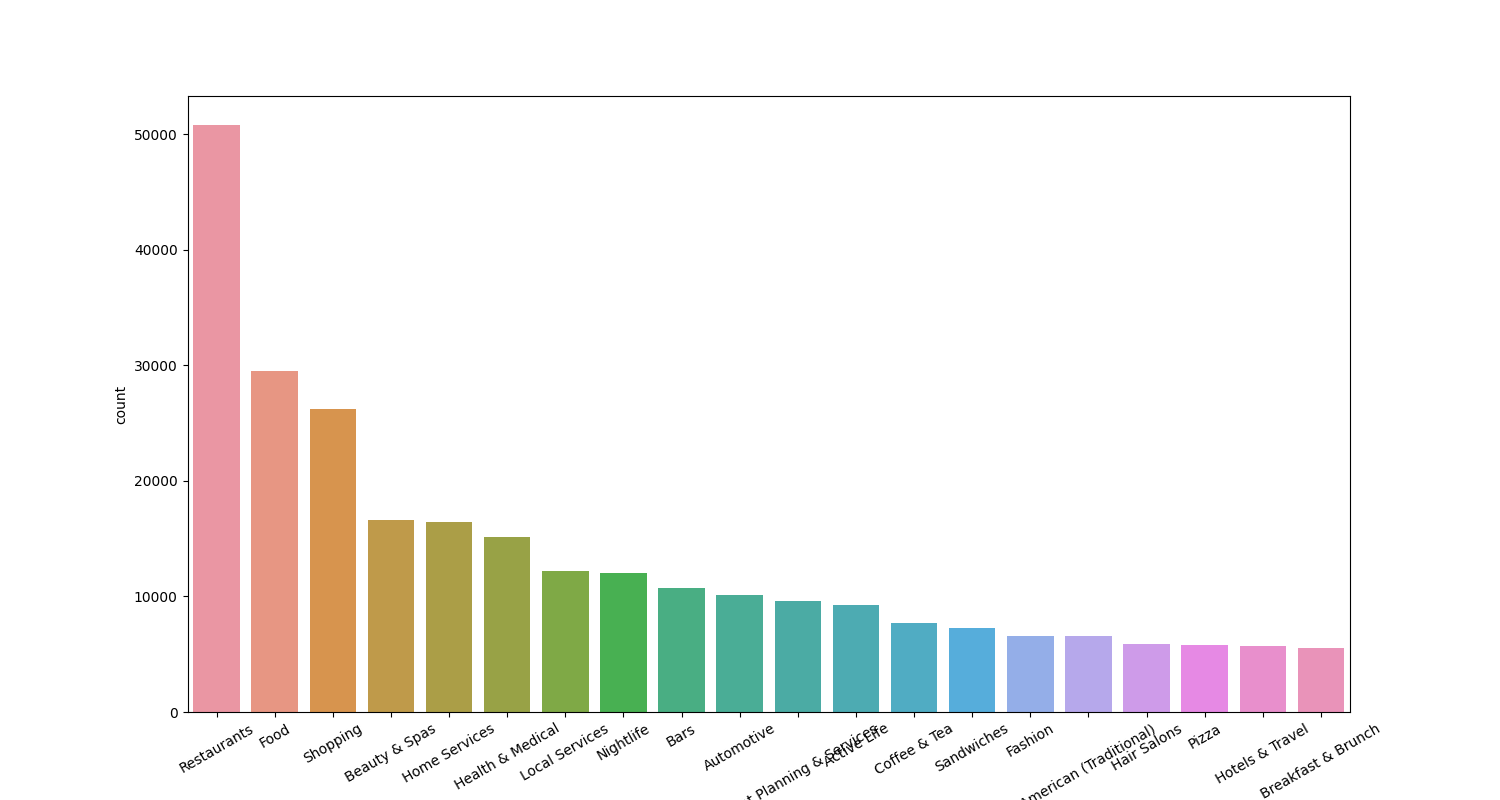

In [13]:
import matplotlib

# Create barchart vizualization
pandasDF = groupby_count.toPandas()
pandasDFcharting = pandasDF.head(20)

# Plot
plt.figure(figsize = (15,8))
ax=sns.barplot(x='categories', y='count', data=pandasDFcharting)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

%matplot plt 


# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [14]:
df_reviews = spark.read.json('s3://yelpdatasta9760/yelp_academic_dataset_review.json')

print(f'Total Columns: {len(df_reviews.dtypes)}')
print(f'Total Rows: {df_reviews.count():,}')
df_reviews.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,635,403
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [15]:
# Show 2 columns of review dataframe
df_stars = df_reviews.select('business_id', 'stars')
df_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [16]:
# Get average score of each business, only reviews with greater than 150 characters are counted
df_reviews.createOrReplaceTempView('Yelpdata_reviews')

sqldf = spark.sql(
'''
SELECT business_id, avg(stars) as Review_Score 
FROM Yelpdata_reviews
WHERE length(text) >= 150
GROUP BY business_id
LIMIT 20
'''
)

sqldf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|      Review_Score|
+--------------------+------------------+
|uEUweopM30lHcVxjO...|2.7777777777777777|
|wdBrDCbZopowEkIEX...| 4.466666666666667|
|bOnsvrz1VkbrZM1jV...|               3.8|
|R0IJhEI-zSJpYT1YN...| 3.533333333333333|
|XzXcpPCb8Y5huklEN...| 4.666666666666667|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [17]:
# join business and reviews dataframes

df_business.createOrReplaceTempView('Yelpdata_business')

sqldf1 = spark.sql(
'''
SELECT yb.business_id, avg(yr.stars) as Review_Score, first(yb.name) as name, first(yb.city) as city, first(yb.state) as state
FROM Yelpdata_business yb
JOIN Yelpdata_reviews yr ON yb.business_id = yr.business_id
GROUP BY yb.business_id
LIMIT 20
'''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [18]:
sqldf1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+--------------------+-----------------+-----+
|         business_id|      Review_Score|                name|             city|state|
+--------------------+------------------+--------------------+-----------------+-----+
|--0DF12EMHYI8XIgo...| 4.333333333333333|Joe's Advanced Au...|           Smyrna|   GA|
|--hLwt1d-CymEs7KT...|3.8333333333333335|Little Amsterdam ...|        Milwaukie|   OR|
|-0sIQ96u8XevGUXZ-...| 3.779816513761468|Copacabana Cuba Cafe|Altamonte Springs|   FL|
|-1WrFiy7X43HD4OxF...| 3.730769230769231|            Cinemark|         Columbus|   OH|
|-1rvXk4zbX3I6ddMC...| 4.087378640776699|     ZenCha Tea Cafe|           Bexley|   OH|
|-2-RiF6h0SVVkjVwe...| 2.857142857142857|Canton Plumbing &...|           Canton|   MA|
|-2OFRpDsjtwFJP31W...|2.6666666666666665|             Denny's|         PORTLAND|   OR|
|-2joeHbqY9TayADes...| 4.119760479041916|        Lynwood Cafe|         Randolph|   MA|
|-3CNyvzgW7ASXPmSZ...|              2.75|St

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [19]:
# skew test

# (row['avg(stars)'] - row['stars']) / row['stars']

sqldf2 = spark.sql(
'''
SELECT t1.business_id, t1.Review_Score_with_text, t2.Total_Avg_score, (t1.Review_Score_with_text-t2.Total_Avg_score) as Skew
FROM
(
SELECT yb.business_id, avg(yr.stars) as Review_Score_with_text
FROM Yelpdata_business yb
JOIN Yelpdata_reviews yr ON yb.business_id = yr.business_id
WHERE length(yr.text) >= 150
GROUP BY yb.business_id ) t1

INNER JOIN 

(SELECT yb.business_id, avg(yr.stars) as Total_Avg_Score 
FROM Yelpdata_business yb
JOIN Yelpdata_reviews yr ON yb.business_id = yr.business_id
GROUP BY yb.business_id) t2 

ON t1.business_id = t2.business_id

'''
)

sqldf2.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------------+------------------+--------------------+
|         business_id|Review_Score_with_text|   Total_Avg_score|                Skew|
+--------------------+----------------------+------------------+--------------------+
|--JuLhLvq3gyjNnXT...|                   5.0|               5.0|                 0.0|
|--_nBudPOb1lNRgKf...|                 3.875|             3.875|                 0.0|
|--kyOk0waSrCDlbSv...|    3.7777777777777777|3.8666666666666667|-0.08888888888888902|
|--z9usx6Fin8P_f0v...|                   5.0|               5.0|                 0.0|
|-0qeY1293steyCqYh...|                 3.375|             3.375|                 0.0|
|-0wZIJnbYSstEGj3u...|                   1.8|               1.8|                 0.0|
|-1Dcv3siosFTgDJhN...|     4.076923076923077|               4.2|-0.12307692307692353|
|-28M_3R-Iq3KjY3fa...|                   2.7|2.5454545454545454| 0.15454545454545476|
|-2DAKRNW7SwJG4aKo...|     3.689655172413793| 3.774193

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

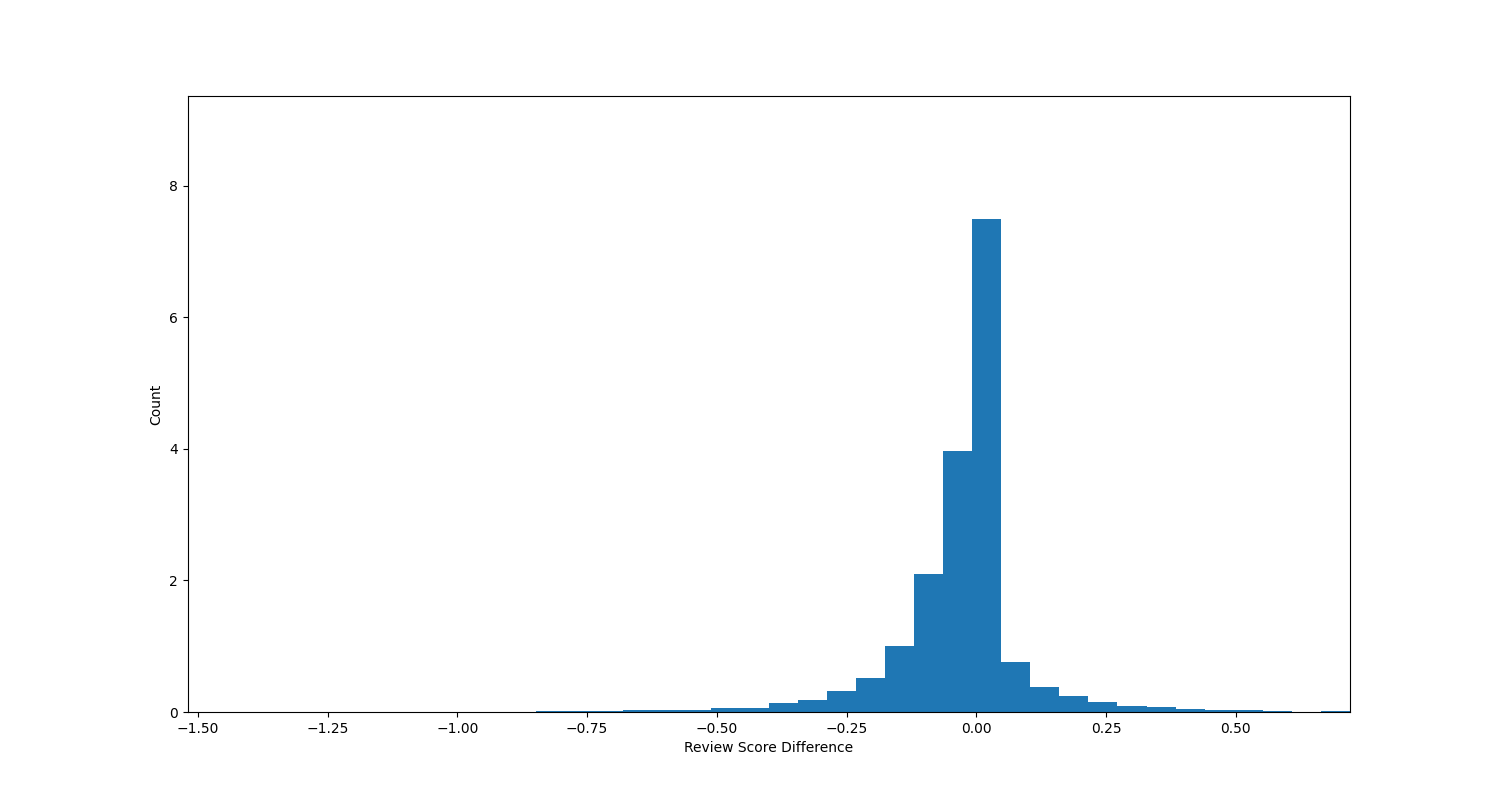

In [20]:
# plot it 
pandas_skew_df = sqldf2.toPandas()

plt.figure(figsize = (15,8))
plt.hist(pandas_skew_df['Skew'], density=True, bins = 100)

plt.margins(x=-.3, y=.25)   # Values in (-0.5, 0.0) zooms in to center

plt.ylabel('Count')
plt.xlabel('Review Score Difference')
plt.show() 

%matplot plt 



So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

Yes, the scores skew negative. This means that reviewers who write long text reviews tend to be more dissatisfied with the business.

### Extra Credit

Let's expand on the previous analysis by breaking out the skew into types of businesses. We will be looking at the 2 top businesses: restaurants and shopping. 

In [21]:
# Lets query the skew by categories
# join with association table for categories

df_assc.createOrReplaceTempView('Yelpdata_categories')

sqldf_ec = spark.sql(
'''
SELECT 

t1.business_id, yc.categories, t1.Review_Score_with_text, t2.Total_Avg_score, 
(t1.Review_Score_with_text-t2.Total_Avg_score) as Skew

FROM

(SELECT yb.business_id, avg(yr.stars) as Review_Score_with_text
FROM Yelpdata_business yb
JOIN Yelpdata_reviews yr ON yb.business_id = yr.business_id
WHERE length(yr.text) >= 150
GROUP BY yb.business_id) t1

INNER JOIN 

(SELECT yb.business_id, avg(yr.stars) as Total_Avg_Score 
FROM Yelpdata_business yb
JOIN Yelpdata_reviews yr ON yb.business_id = yr.business_id
GROUP BY yb.business_id) t2 ON t1.business_id = t2.business_id

INNER JOIN

Yelpdata_categories yc ON t1.business_id = yc.business_id

WHERE yc.categories IN('Restaurants', 'Shopping', 'Food')

'''
)

sqldf_ec.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+----------------------+------------------+--------------------+
|         business_id| categories|Review_Score_with_text|   Total_Avg_score|                Skew|
+--------------------+-----------+----------------------+------------------+--------------------+
|--JuLhLvq3gyjNnXT...|   Shopping|                   5.0|               5.0|                 0.0|
|--_nBudPOb1lNRgKf...|Restaurants|                 3.875|             3.875|                 0.0|
|--kyOk0waSrCDlbSv...|       Food|    3.7777777777777777|3.8666666666666667|-0.08888888888888902|
|--kyOk0waSrCDlbSv...|Restaurants|    3.7777777777777777|3.8666666666666667|-0.08888888888888902|
|-1Dcv3siosFTgDJhN...|       Food|     4.076923076923077|               4.2|-0.12307692307692353|
|-2ysHxktRcDom1m9A...|   Shopping|                   5.0|               5.0|                 0.0|
|-3IqRwpj-iTz1nQWC...|Restaurants|    3.1666666666666665| 2.857142857142857|  0.3095238095238093|
|-5zKNFxuoPm8L9OQ0..

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

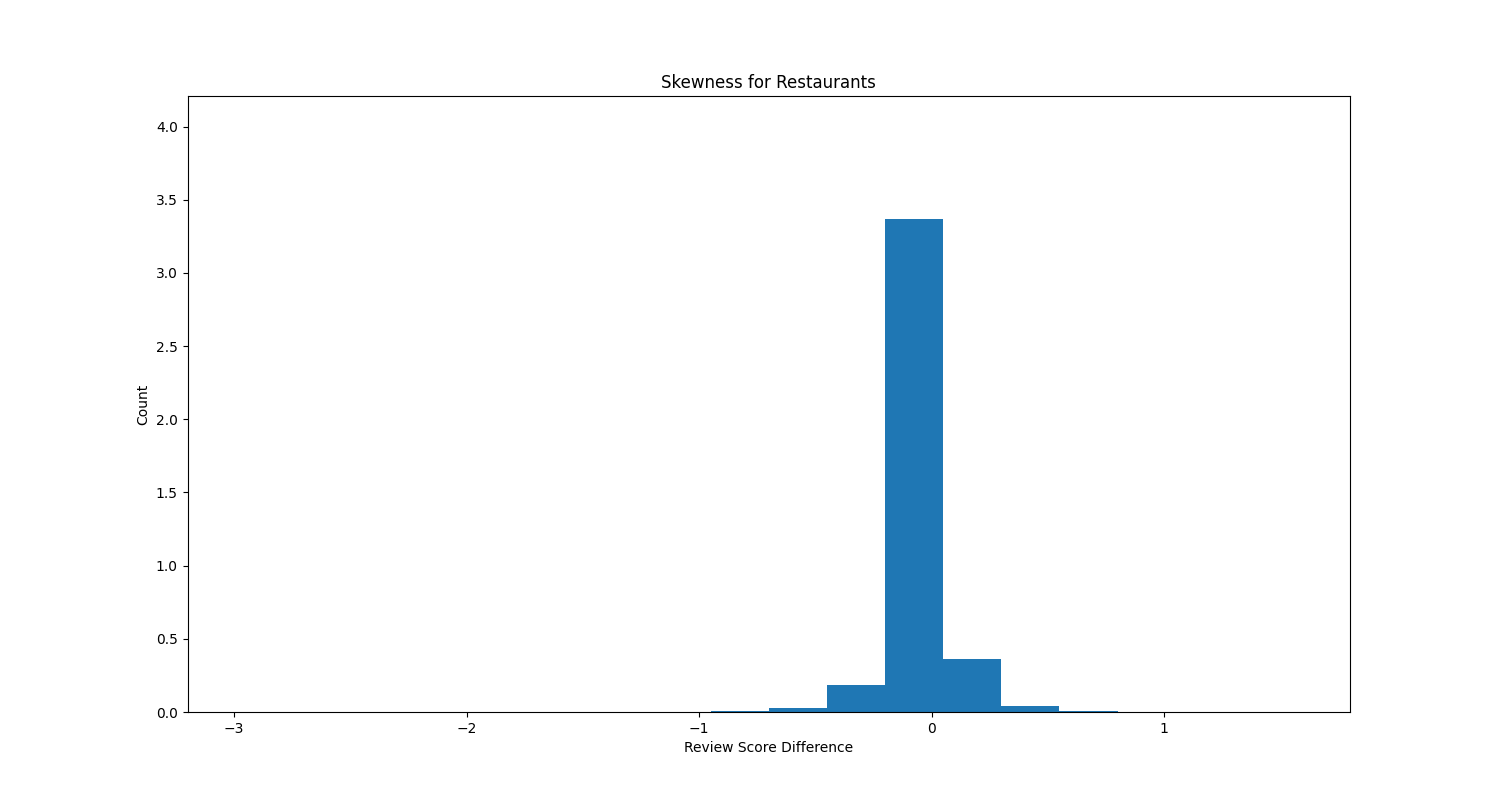

In [22]:
# vizualize the skew by Restaurants
sqldf_ec
pandas_skew_categories = sqldf_ec.toPandas()
df_cate = pandas_skew_categories.loc[pandas_skew_categories['categories']=='Restaurants'] 

plt.figure(figsize = (15,8))
plt.hist(df_cate['Skew'], density=True, bins = 20)
plt.margins(x=0, y=.25)
plt.title("Skewness for Restaurants")
plt.ylabel('Count')
plt.xlabel('Review Score Difference')
plt.show() 

%matplot plt 

For restaurant reviews, review score with long text tend to be slightly lower than average total score

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

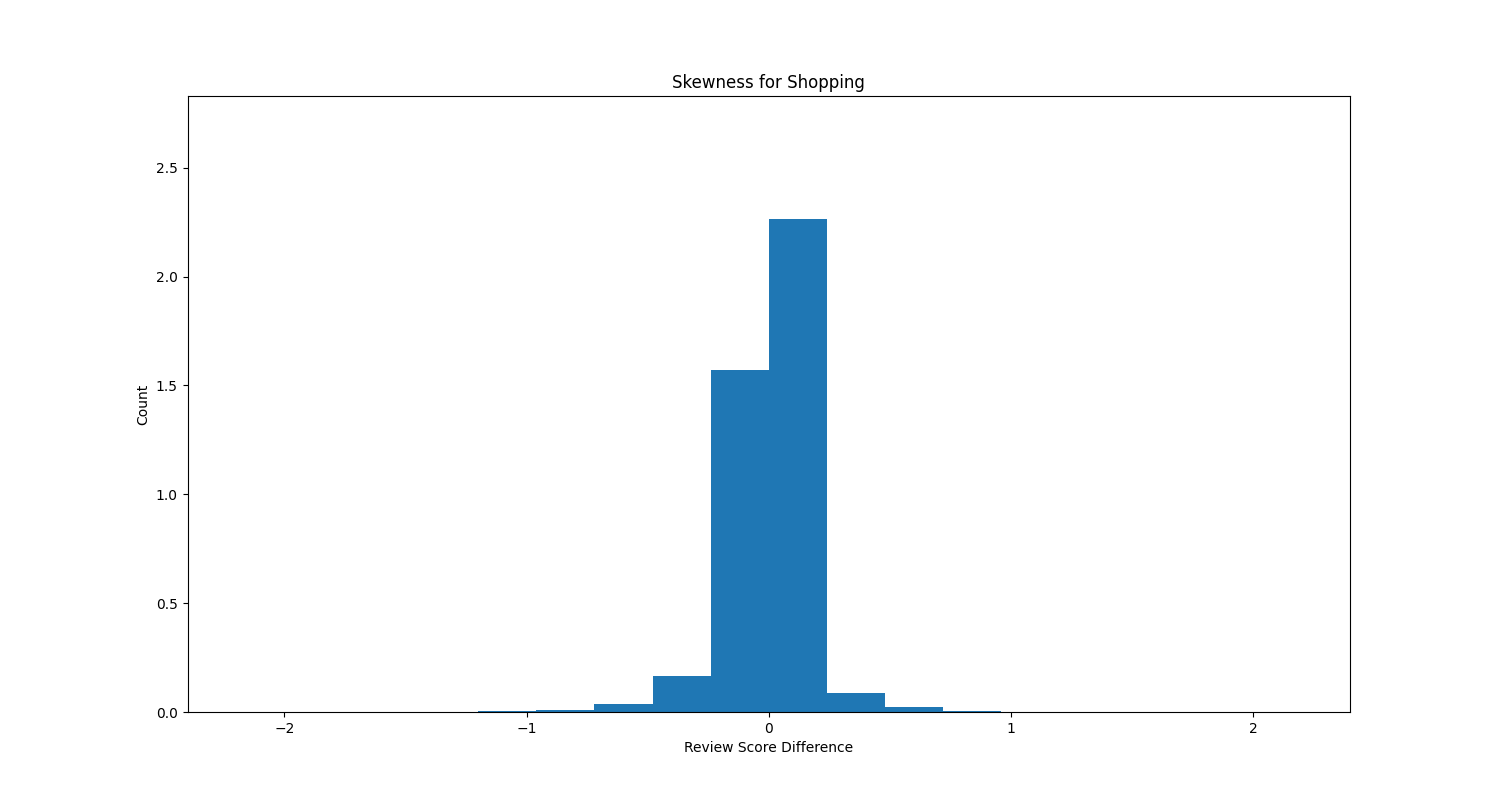

In [23]:
# vizualize the skew by Shopping
sqldf_ec
pandas_skew_categories = sqldf_ec.toPandas()
df_cate = pandas_skew_categories.loc[pandas_skew_categories['categories']=='Shopping'] 

plt.figure(figsize = (15,8))
plt.hist(df_cate['Skew'], density=True, bins = 20)
plt.margins(x=0, y=.25)
plt.title("Skewness for Shopping")
plt.ylabel('Count')
plt.xlabel('Review Score Difference')
plt.show() 

%matplot plt 

No major noticable skewness for shopping reviews.

# Should the Elite be Trusted? (Or, some other analysis of your choice)


For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

### Loading User Data

In [24]:
# Load the user data from s3
df_users = spark.read.json('s3://yelpdatasta9760/yelp_academic_dataset_user.json')

print(f'Total Columns: {len(df_users.dtypes)}')
print(f'Total Rows: {df_users.count():,}')
df_users.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 2,189,457
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [25]:
# Show some columns to see what it looks like
df_show_users = df_users.select('user_id', 'name', 'review_count', 'elite', 'average_stars', 'yelping_since')
df_show_users.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+------------+--------------------+-------------+-------------------+
|             user_id|      name|review_count|               elite|average_stars|      yelping_since|
+--------------------+----------+------------+--------------------+-------------+-------------------+
|q_QQ5kBBwlCcbL1s4...|      Jane|        1220|2006,2007,2008,20...|         3.85|2005-03-14 20:26:35|
|dIIKEfOgo0KqUfGQv...|      Gabi|        2136|2007,2008,2009,20...|         4.09|2007-08-10 19:01:51|
|D6ErcUnFALnCQN4b1...|     Jason|         119|           2010,2011|         3.76|2007-02-07 15:47:53|
|JnPIjvC0cmooNDfsa...|       Kat|         987|2009,2010,2011,20...|         3.77|2009-02-09 16:14:29|
|37Hc8hr3cw0iHLoPz...| Christine|         495|      2009,2010,2011|         3.72|2008-03-03 04:57:05|
|n-QwITZYrXlKQRiV3...|   Natasha|         229|2010,2011,2012,20...|         3.59|2008-06-25 14:53:17|
|eCJoZqpV1fDKJGAsX...|   Bridget|          51|                    |         3.86|2

In [26]:
# Build association table for easier analytics of user table
df_inter = df_users.withColumn('elite', psf.explode(psf.split("elite", ",")))
df_assc_user = df_inter.select('user_id', 'name', 'review_count', 'elite', 'average_stars', 'yelping_since')
df_assc_user.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+------------+-----+-------------+-------------------+
|             user_id|name|review_count|elite|average_stars|      yelping_since|
+--------------------+----+------------+-----+-------------+-------------------+
|q_QQ5kBBwlCcbL1s4...|Jane|        1220| 2006|         3.85|2005-03-14 20:26:35|
|q_QQ5kBBwlCcbL1s4...|Jane|        1220| 2007|         3.85|2005-03-14 20:26:35|
|q_QQ5kBBwlCcbL1s4...|Jane|        1220| 2008|         3.85|2005-03-14 20:26:35|
|q_QQ5kBBwlCcbL1s4...|Jane|        1220| 2009|         3.85|2005-03-14 20:26:35|
|q_QQ5kBBwlCcbL1s4...|Jane|        1220| 2010|         3.85|2005-03-14 20:26:35|
+--------------------+----+------------+-----+-------------+-------------------+
only showing top 5 rows

In [27]:
# Calculate Elite only review score and compare to Total Average score

df_assc_user.createOrReplaceTempView('Yelpdata_assc_users')

sqldf3 = spark.sql(
'''
SELECT t1.business_id, t1.EliteOnly_Review_Score, t2.Total_Avg_Score, (t1.EliteOnly_Review_Score-t2.Total_Avg_Score) as Elite_Skew
FROM

(SELECT yr.business_id, avg(yr.stars) as EliteOnly_Review_Score 
FROM Yelpdata_reviews yr 
JOIN Yelpdata_assc_users yu ON (yu.user_id = yr.user_id AND YEAR(yr.date)= yu.elite)
GROUP BY yr.business_id
ORDER BY yr.business_id) t1

JOIN

(SELECT yb.business_id, avg(yr.stars) as Total_Avg_Score 
FROM Yelpdata_business yb
JOIN Yelpdata_reviews yr ON yb.business_id = yr.business_id
GROUP BY yb.business_id
ORDER BY yb.business_id) t2

ON t1.business_id=t2.business_id

'''
)

sqldf3.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------------+------------------+--------------------+
|         business_id|EliteOnly_Review_Score|   Total_Avg_Score|          Elite_Skew|
+--------------------+----------------------+------------------+--------------------+
|--164t1nclzzmca7e...|    3.6451612903225805| 3.877551020408163| -0.2323897300855826|
|--6COJIAjkQwSUZci...|    3.9411764705882355| 4.107843137254902|-0.16666666666666607|
|--DzGwfuJH12DjYz9...|                   3.0|2.2666666666666666|  0.7333333333333334|
|--JKSSgnfoOjVDFGv...|                   5.0|              4.04|                0.96|
|--JuLhLvq3gyjNnXT...|                   5.0|               5.0|                 0.0|
|--ToovR1Ob2e131Zi...|                   5.0|              4.68|  0.3200000000000003|
|--UNNdnHRhsyFUbDg...|    4.4798850574712645| 4.390995260663507| 0.08888979680775755|
|--_nBudPOb1lNRgKf...|                   4.0|             3.875|               0.125|
|--bbZa1KPYSmW0X4o...|                   3.9| 4.148936

In [28]:
# plot it 
elite_skew_df = sqldf3.toPandas()

plt.figure(figsize = (15,8))
plt.hist(elite_skew_df['Elite_Skew'], density=True, bins = 40)
plt.margins(x=0, y=.25)
plt.title("Skewness for Elite Yelpers (Elite Score - Avg Total Score)")
plt.ylabel('Count')
plt.xlabel('Review Score Difference')
plt.show() 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

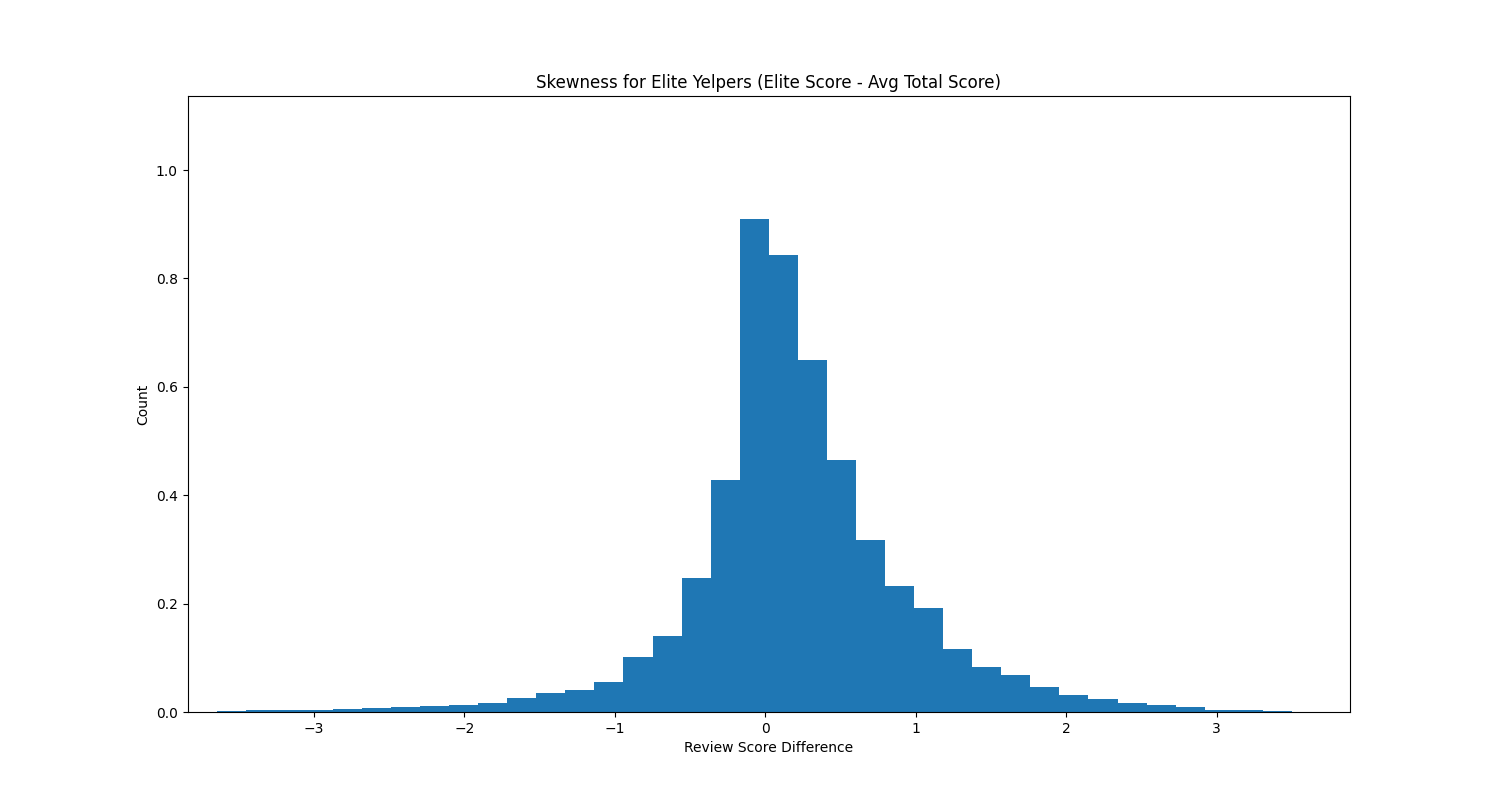

In [29]:
%matplot plt 

from the plot, elite users tend to give very slightly (almost not noticable) HIGHER score than the total average reviews. 